In [48]:
import scipy
from scipy import stats
from scipy import special
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
import palettable as pal
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import cross_decomposition
from sklearn import linear_model
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.optimizers import RMSprop, SGD
from keras import backend as K
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
%matplotlib inline

In [49]:
properties = pd.DataFrame.from_csv("data/Species_properites_likelihood.csv")

In [153]:
concentration = pd.DataFrame.from_csv("data/simulated_counts.csv")
for i in range(concentration.shape[0]):
        concentration.iloc[i,:] = concentration.iloc[i,:] / concentration.iloc[i,:].max()

In [159]:
X_arr = np.array(concentration)
#X_reduced = TruncatedSVD(n_components=500, random_state=0).fit_transform(X_arr)
tsneMOD = TSNE(n_components=10, random_state=1, learning_rate=1800, verbose=3, perplexity=20)
#np.set_printoptions(suppress=True)
X_tsne = tsneMOD.fit_transform(X_arr)
tsneMOD.get_params()

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.141045
[t-SNE] Iteration 25: error = -24.7828293, gradient norm = 0.0000000
[t-SNE] Iteration 25: gradient norm 0.000000. Finished.
[t-SNE] Iteration 50: error = -24.7828293, gradient norm = 0.0000000
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] Error after 50 iterations with early exaggeration: -24.782829
[t-SNE] Iteration 75: error = -24.7828293, gradient norm = 0.0000000
[t-SNE] Iteration 75: gradient norm 0.000000. Finished.
[t-SNE] Error after 75 iterations: -24.782829


{'angle': 0.5,
 'early_exaggeration': 4.0,
 'init': 'random',
 'learning_rate': 1800,
 'method': 'barnes_hut',
 'metric': 'euclidean',
 'min_grad_norm': 1e-07,
 'n_components': 10,
 'n_iter': 1000,
 'n_iter_without_progress': 30,
 'perplexity': 20,
 'random_state': 1,
 'verbose': 3}

In [152]:
concentration.shape[1]

10000

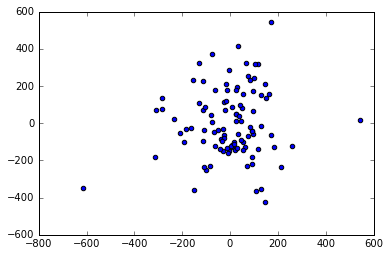

In [105]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

In [55]:
print len(X_tsne[:, 0])
print len(X_tsne[0,:])

100
10


In [106]:
pca = decomposition.PCA(n_components=10)
pca.fit(concentration)
X = pca.transform(concentration)

In [107]:
dictlearn = decomposition.DictionaryLearning(n_components=10)
dictlearn.fit(concentration)
X2 = dictlearn.transform(concentration)

In [157]:
lm = linear_model.LinearRegression()
lm.fit(X, preprocessing.scale(np.array(properties)))

lm2 = linear_model.LinearRegression()
lm2.fit(X2, preprocessing.scale(np.array(properties)))

lm3 = linear_model.LinearRegression()
lm3.fit(X_tsne, preprocessing.scale(np.array(properties)))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [158]:
print lm.score(X, preprocessing.scale(np.array(properties)))
print lm2.score(X2, preprocessing.scale(np.array(properties)))
print lm3.score(X_tsne, preprocessing.scale(np.array(properties)))

0.371468921466
0.344814051703
0.181654678054


In [11]:
R2 = 1 - ((lm.predict(X) - preprocessing.scale(np.array(properties))) ** 2).sum(axis = 0) / ((preprocessing.scale(np.array(properties))) ** 2).sum(axis = 0)

In [12]:
R2

array([ 0.33003329,  0.20464316,  0.11578765,  0.50405814,  0.40726832,
        0.8171301 ,  0.51514636,  0.59247292,  0.12509838,  0.10305089])

In [13]:
ae = Sequential()
ae.add(Dense(10, input_dim=concentration.shape[1]))
ae.add(Activation('relu'))
ae.add(Dense(concentration.shape[1]))
ae.add(Activation('softmax'))
ae.compile(optimizer=SGD(lr=.01, momentum=.9, decay=0.001, nesterov=True), loss='categorical_crossentropy')

In [ ]:
x = preprocessing.scale(np.array(concentration))
y = np.array(concentration)
ae.fit(x, y, batch_size=100, nb_epoch=1000, verbose=1)

Epoch 1/1000
100/100 [==============================] - 0s - loss: 9.2109
Epoch 2/1000
100/100 [==============================] - 0s - loss: 9.2059
Epoch 3/1000
100/100 [==============================] - 0s - loss: 9.1990
Epoch 4/1000
100/100 [==============================] - 0s - loss: 9.1899
Epoch 5/1000
100/100 [==============================] - 0s - loss: 9.1785
Epoch 6/1000
100/100 [==============================] - 0s - loss: 9.1635
Epoch 7/1000
100/100 [==============================] - 0s - loss: 9.1433
Epoch 8/1000
100/100 [==============================] - 0s - loss: 9.1146
Epoch 9/1000
100/100 [==============================] - 0s - loss: 9.0718
Epoch 10/1000
100/100 [==============================] - 0s - loss: 9.0045
Epoch 11/1000
100/100 [==============================] - 0s - loss: 8.8951
Epoch 12/1000
100/100 [==============================] - 0s - loss: 8.7136
Epoch 13/1000
100/100 [==============================] - 0s - loss: 8.4066
Epoch 14/1000
100/100 [===========

In [193]:
K.function()

<function keras.backend.theano_backend.function>

In [144]:
np.mean(x)

6.0111915445304473e-18